In [1]:
import keypoint_moseq as kpms
import jax

In [2]:
project_path = '/home/bagotlab/heike.s/Data/ValenceProfile/kpmoseq_model/'
dlc_path = '/home/bagotlab/heike.s/Data/DLC/960x720_40fps_top-heike-2022-08-22/'
training_data = project_path + 'training_videos/unfiltered/'

## Project Setup

In [3]:
project_dir = project_path 
config = lambda: kpms.load_config(project_dir)

In [4]:
kpms.setup_project(project_dir, deeplabcut_config = dlc_path + 'config.yaml')

The directory
`/home/bagotlab/heike.s/Data/ValenceProfile/kpmoseq_model/` already
exists. Use `overwrite=True` or pick a different name


In [5]:
kpms.update_config(
    project_dir,
    anterior_bodyparts=['nose'],
    posterior_bodyparts=['tail_base'])

In [4]:
# load data (e.g. from DeepLabCut)
keypoint_data_path = training_data
coordinates, confidences, bodyparts = kpms.load_keypoints(keypoint_data_path, 'deeplabcut')

# format data for modeling
data, metadata = kpms.format_data(coordinates, confidences, **config())

Loading keypoints: 100%|██████████████| 560/560 [00:07<00:00, 71.07it/s]


>=90.0% of variance exlained by 6 components.


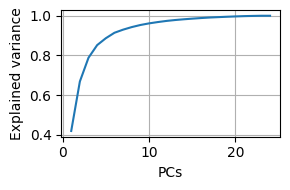

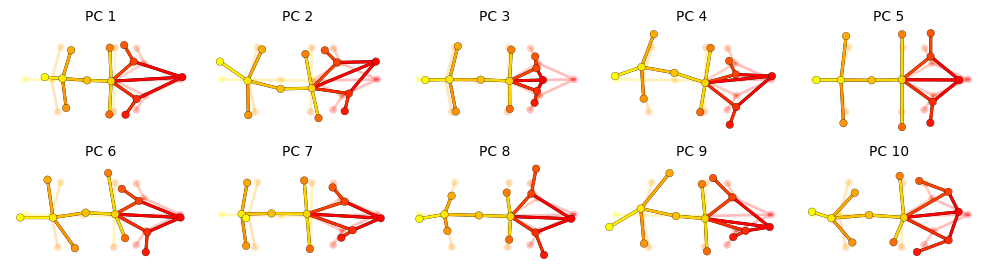

In [6]:
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())

In [7]:
kpms.update_config(project_dir, latent_dim=6)

## Model Fitting

#### Select Kappa
Manually adjusted kappa in both AR and non-AR models to achieve desired syllable duration, as recommended by tool developers.
1e5 for AR model and 5e4 for non-AR model produces syllables with a median duration of 16 frames (i.e., 400ms).

In [18]:
model_name = 'appav2309_unfiltered_1e5_5e4'
seed = 2496
num_ar_iters = 50
ar_only_kappa = 1e5
num_ar_iters = 50
full_model_kappa = 5e4
num_full_iters = 450

In [19]:
# initialize the model
model = kpms.init_model(data, 
                        pca = pca, 
                        seed = seed, 
                        model_name = model_name,
                        **config())


Outputs will be saved to /home/bagotlab/heike.s/Data/ValenceProfile/kp
moseq_model/appav2309_unfiltered_1e5_5e4


 20%|██████▊                            | 10/51 [00:27<01:53,  2.78s/it]

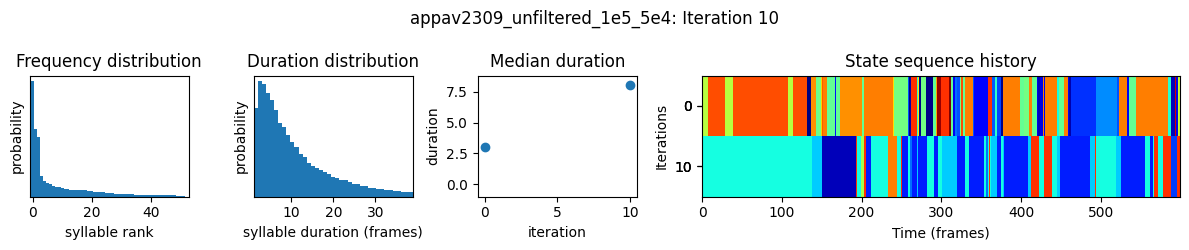

 39%|█████████████▋                     | 20/51 [00:59<01:27,  2.82s/it]

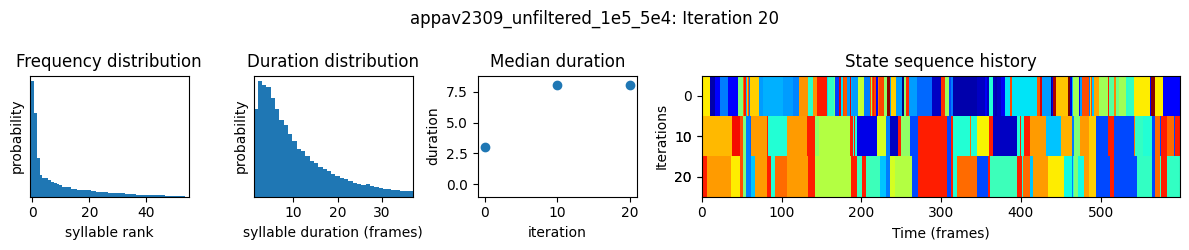

 59%|████████████████████▌              | 30/51 [01:31<00:59,  2.83s/it]

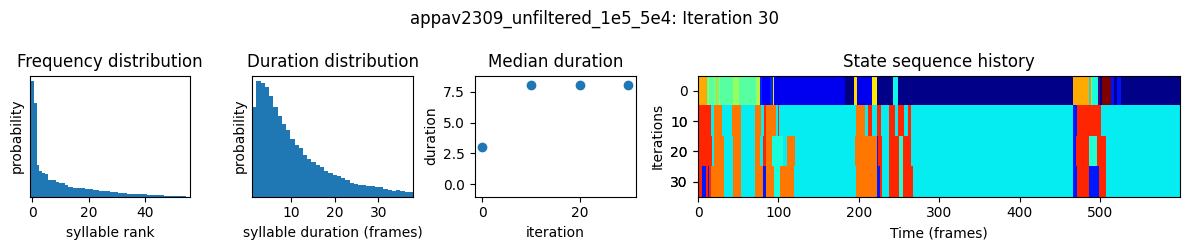

 78%|███████████████████████████▍       | 40/51 [02:02<00:31,  2.83s/it]

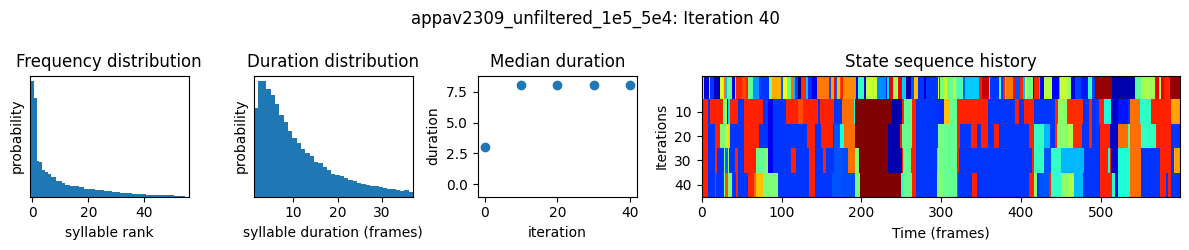

 98%|██████████████████████████████████▎| 50/51 [02:34<00:02,  2.83s/it]

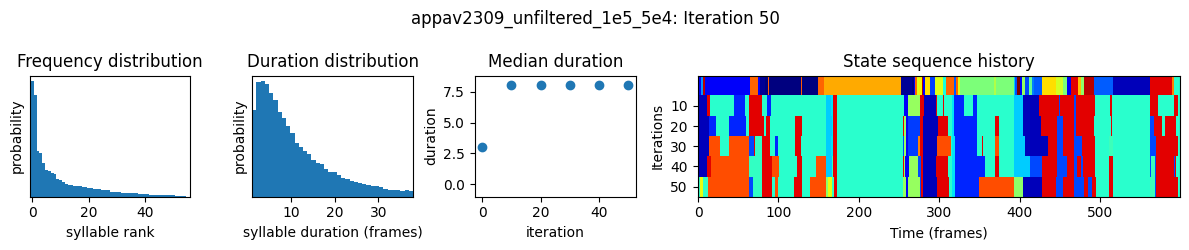

100%|███████████████████████████████████| 51/51 [02:42<00:00,  3.18s/it]


In [20]:
# optionally modify kappa
model = kpms.update_hypparams(model, kappa = ar_only_kappa)

# AR model
model, model_name = kpms.fit_model(
    model, 
    data, 
    metadata, 
    project_dir,
    ar_only = True, 
    num_iters = num_ar_iters,
    save_every_n_iters = 10, 
    model_name = model_name)

Outputs will be saved to /home/bagotlab/heike.s/Data/ValenceProfile/kp
moseq_model/appav2309_unfiltered_1e5_5e4


  2%|▊                                 | 10/401 [01:28<57:23,  8.81s/it]

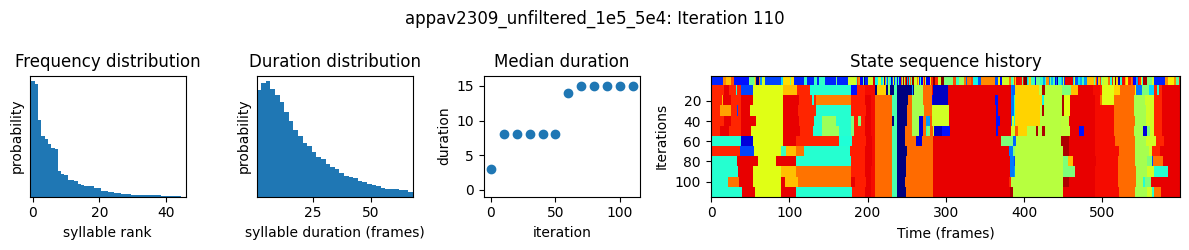

  5%|█▋                                | 20/401 [03:02<56:26,  8.89s/it]

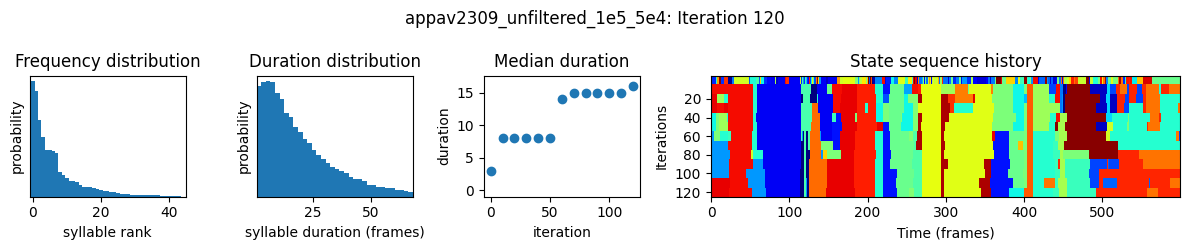

  7%|██▌                               | 30/401 [04:36<55:02,  8.90s/it]

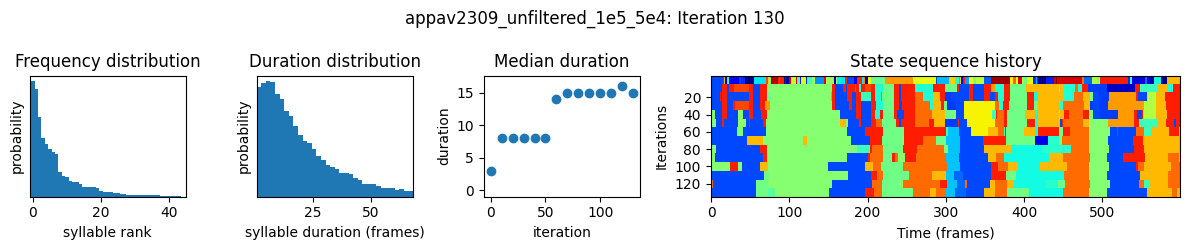

 10%|███▍                              | 40/401 [06:11<53:28,  8.89s/it]

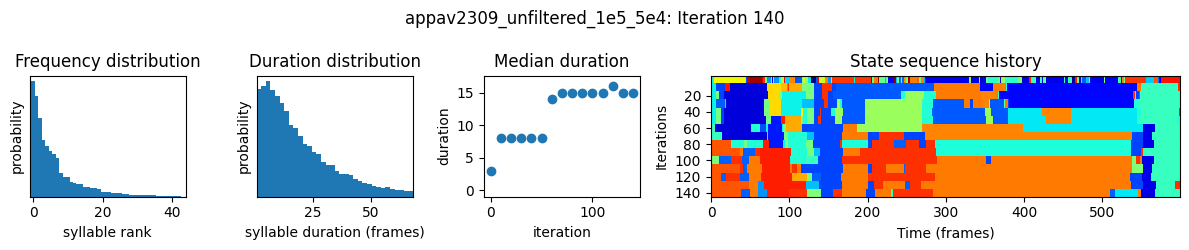

 12%|████▏                             | 50/401 [07:45<52:00,  8.89s/it]

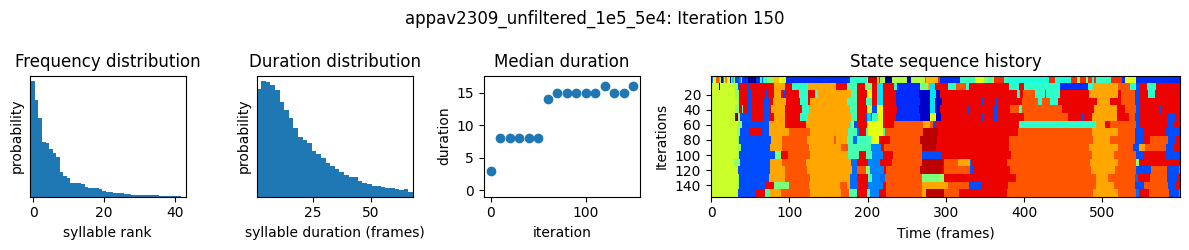

 15%|█████                             | 60/401 [09:20<50:36,  8.91s/it]

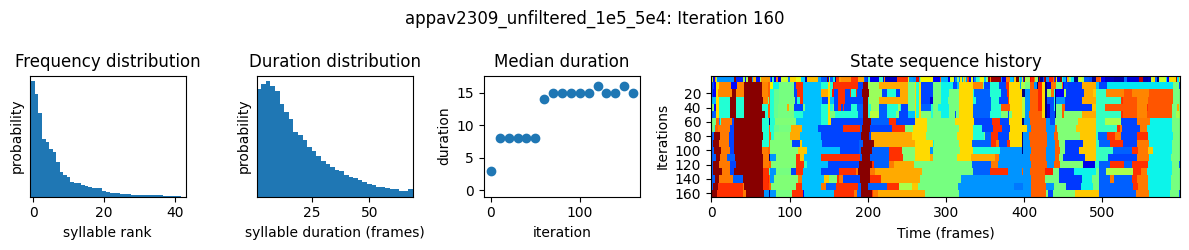

 17%|█████▉                            | 70/401 [10:55<49:10,  8.91s/it]

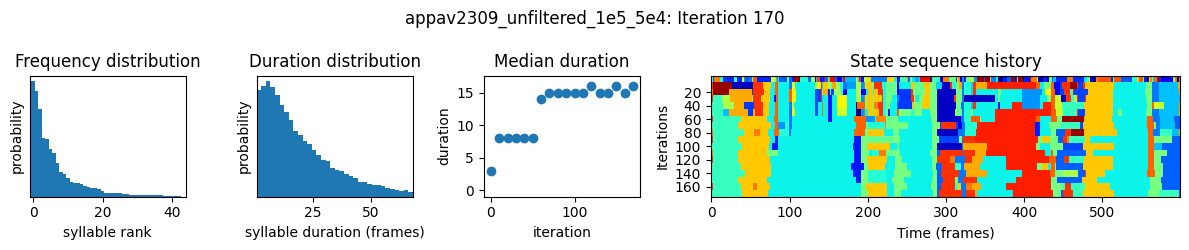

 20%|██████▊                           | 80/401 [12:30<47:37,  8.90s/it]

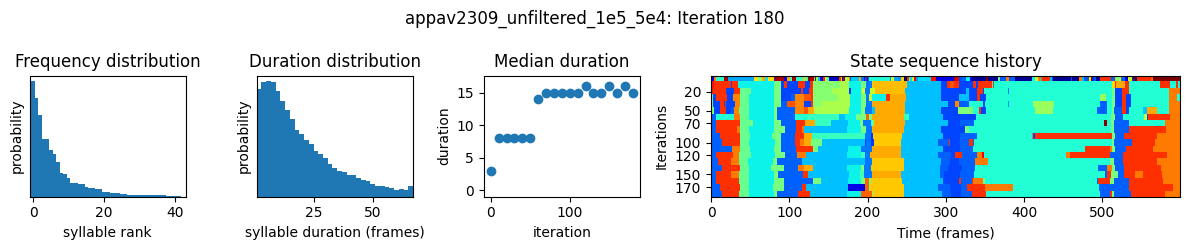

 22%|███████▋                          | 90/401 [14:05<46:02,  8.88s/it]

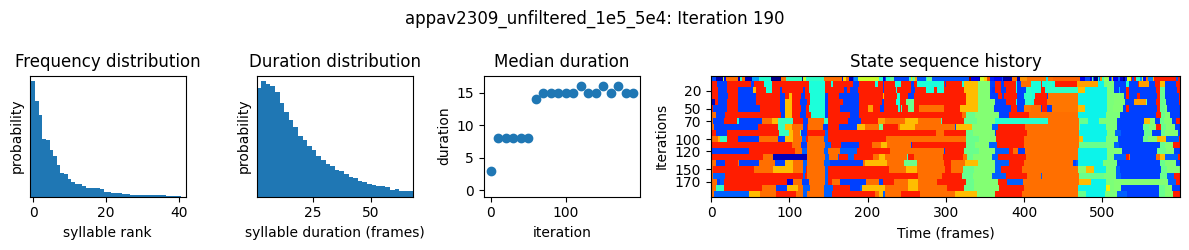

 25%|████████▏                        | 100/401 [15:41<44:40,  8.90s/it]

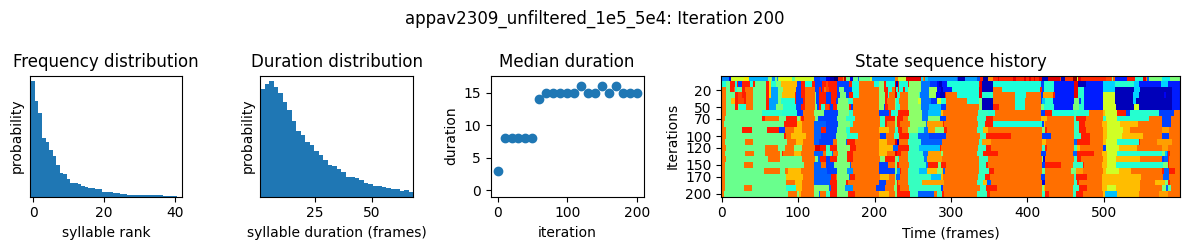

 27%|█████████                        | 110/401 [17:16<43:08,  8.90s/it]

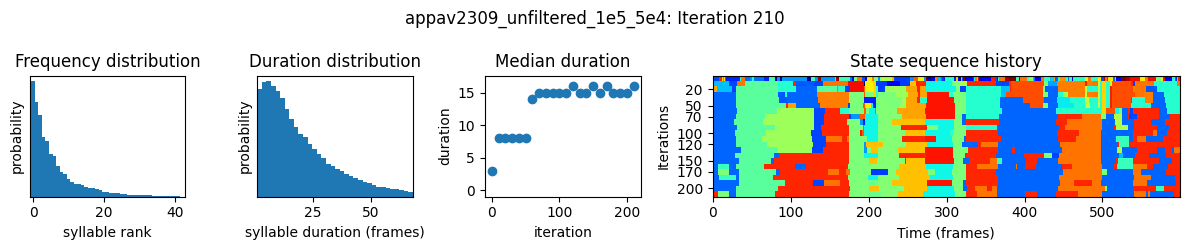

 30%|█████████▉                       | 120/401 [18:51<41:36,  8.88s/it]

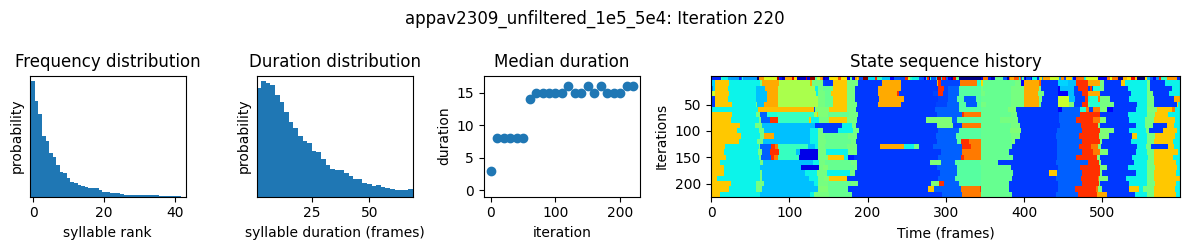

 32%|██████████▋                      | 130/401 [20:27<40:15,  8.91s/it]

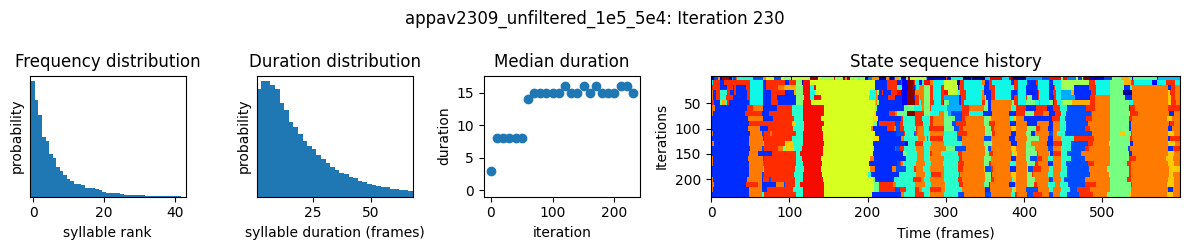

 35%|███████████▌                     | 140/401 [22:03<38:46,  8.91s/it]

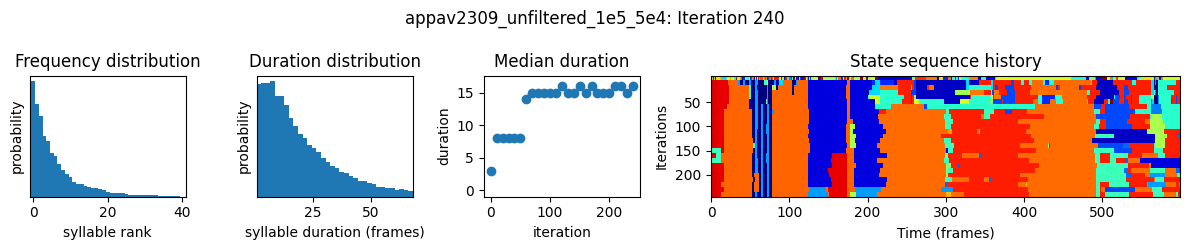

 37%|████████████▎                    | 150/401 [23:39<37:16,  8.91s/it]

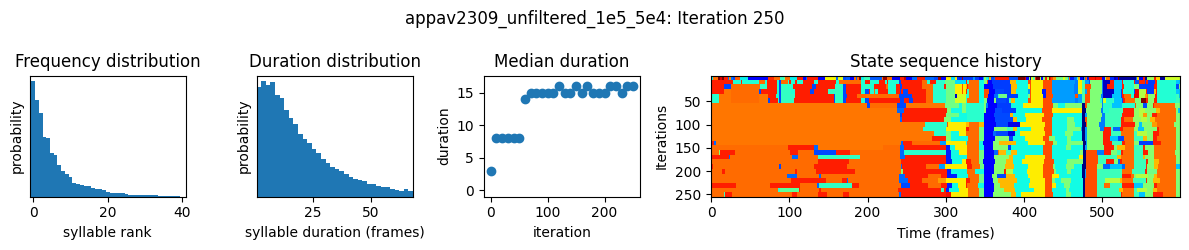

 40%|█████████████▏                   | 160/401 [25:16<35:48,  8.92s/it]

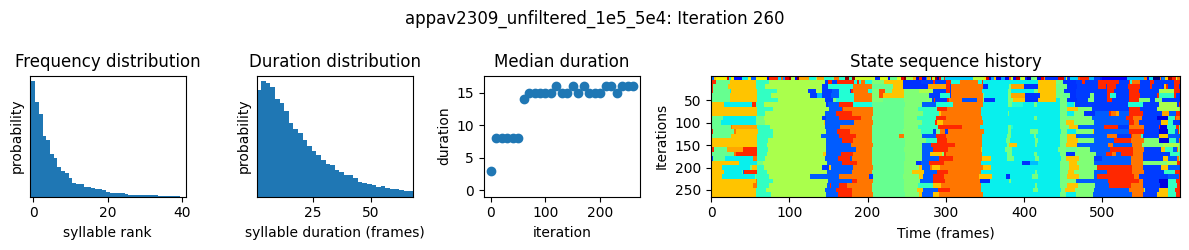

 42%|█████████████▉                   | 170/401 [26:53<34:19,  8.91s/it]

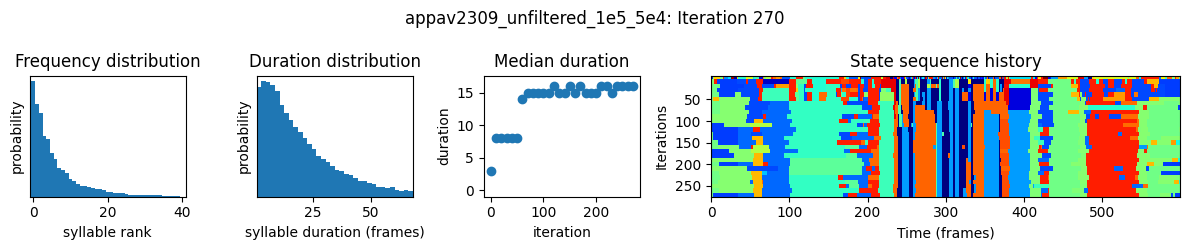

 45%|██████████████▊                  | 180/401 [28:29<32:53,  8.93s/it]

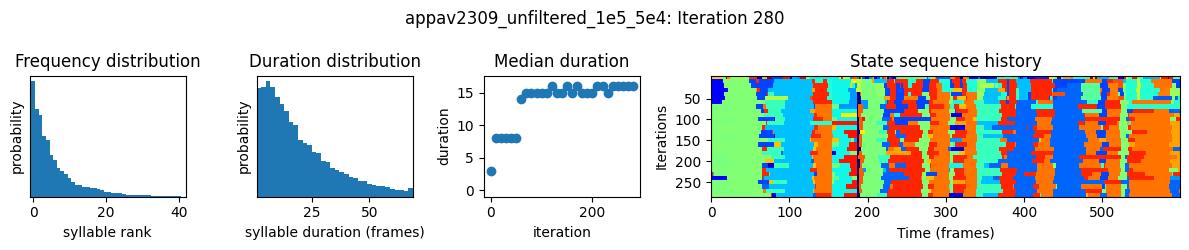

 47%|███████████████▋                 | 190/401 [30:06<31:23,  8.93s/it]

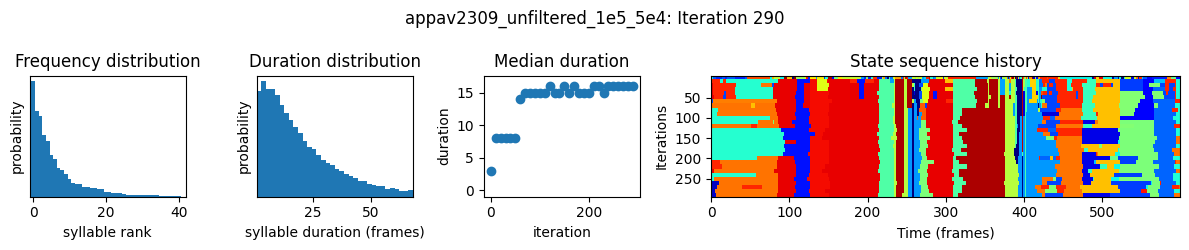

 50%|████████████████▍                | 200/401 [31:45<29:56,  8.94s/it]

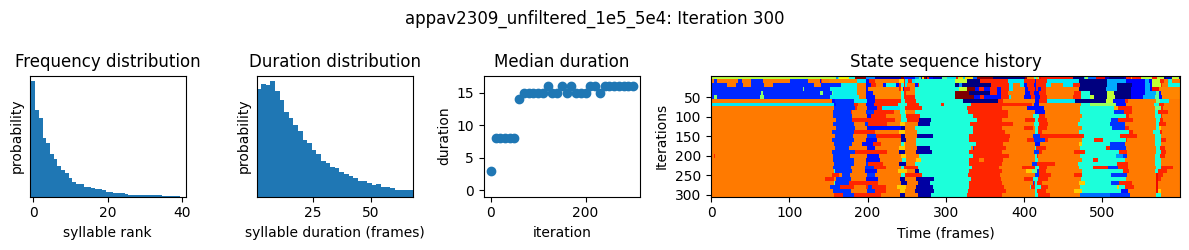

 52%|█████████████████▎               | 210/401 [33:22<28:25,  8.93s/it]

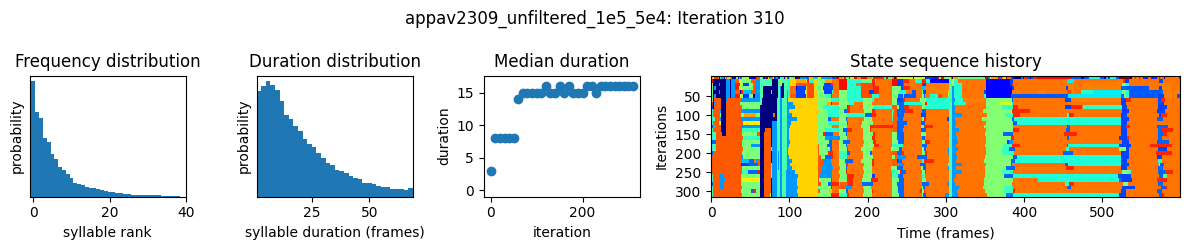

 55%|██████████████████               | 220/401 [35:00<26:54,  8.92s/it]

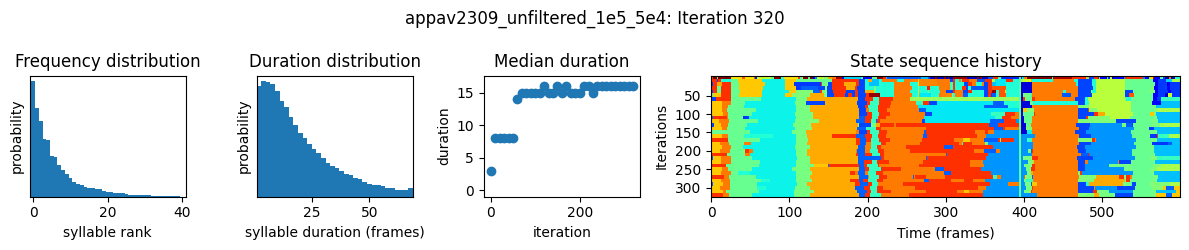

 57%|██████████████████▉              | 230/401 [36:37<25:23,  8.91s/it]

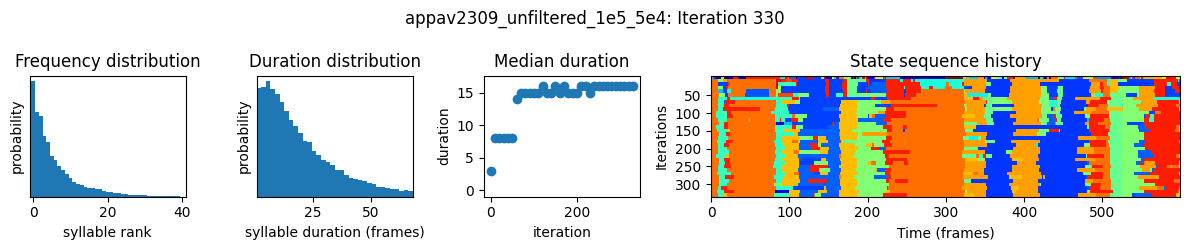

 60%|███████████████████▊             | 240/401 [38:15<23:58,  8.94s/it]

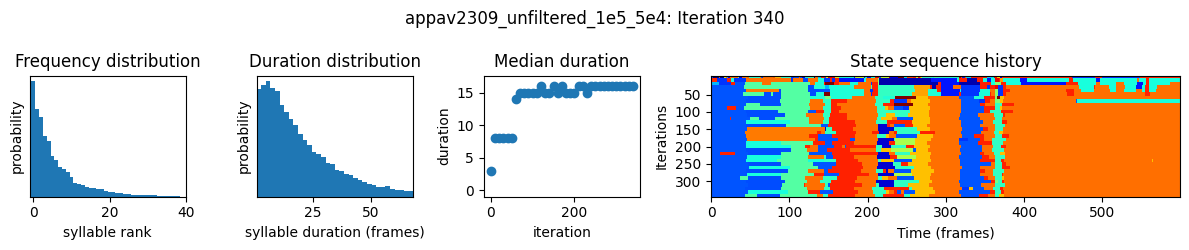

 62%|████████████████████▌            | 250/401 [39:53<22:32,  8.96s/it]

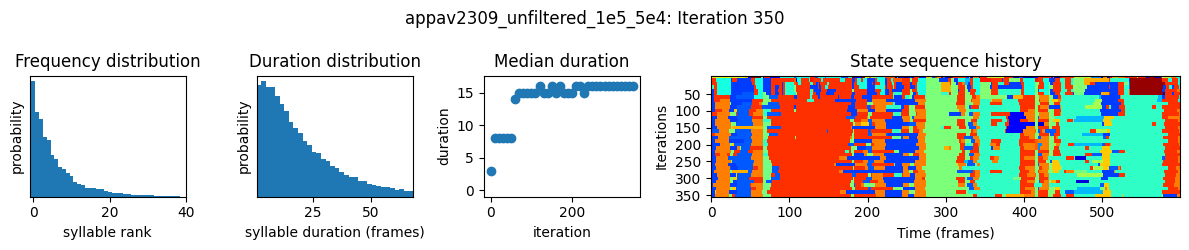

 65%|█████████████████████▍           | 260/401 [41:31<20:58,  8.93s/it]

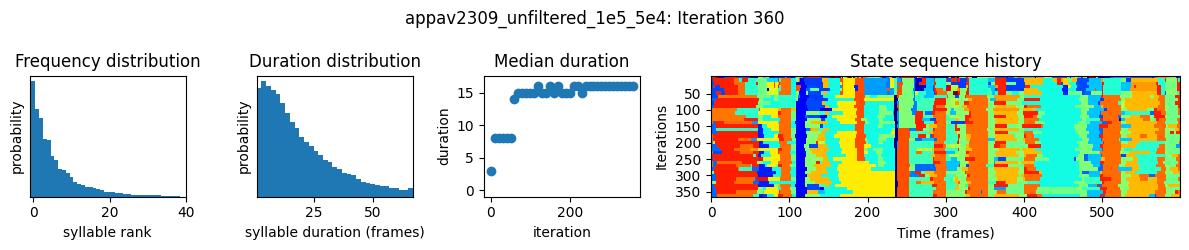

 67%|██████████████████████▏          | 270/401 [43:09<19:30,  8.93s/it]

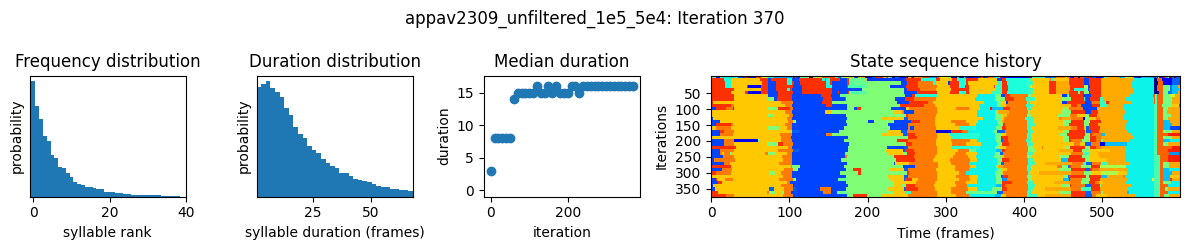

 70%|███████████████████████          | 280/401 [44:47<18:00,  8.93s/it]

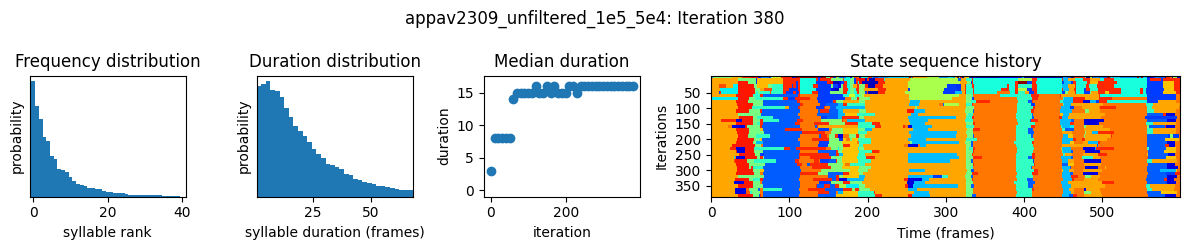

 72%|███████████████████████▊         | 290/401 [46:26<16:32,  8.94s/it]

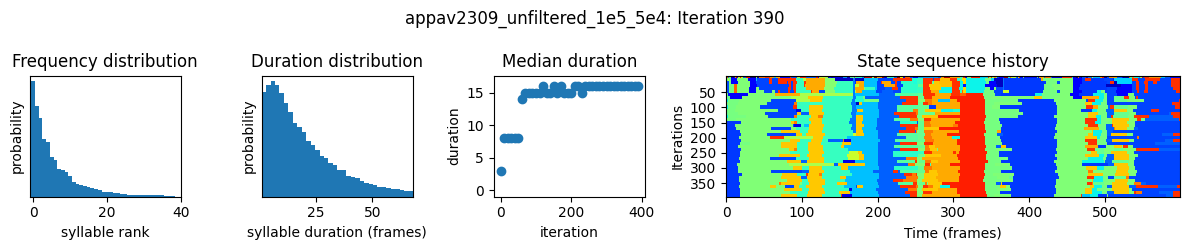

 75%|███████████████████████▏       | 300/401 [1:03:41<34:11, 20.31s/it]

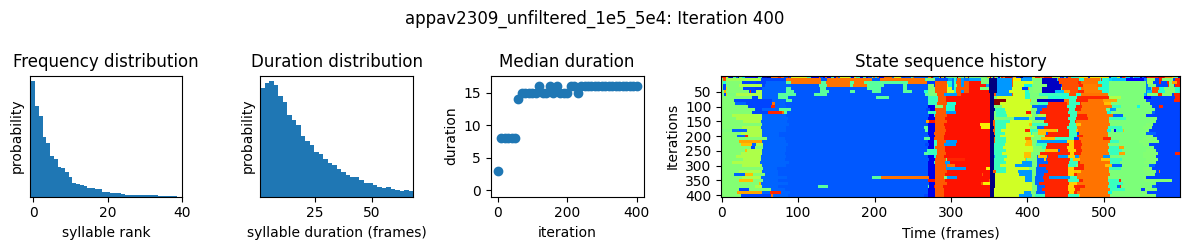

 77%|███████████████████████▉       | 310/401 [1:05:21<14:06,  9.30s/it]

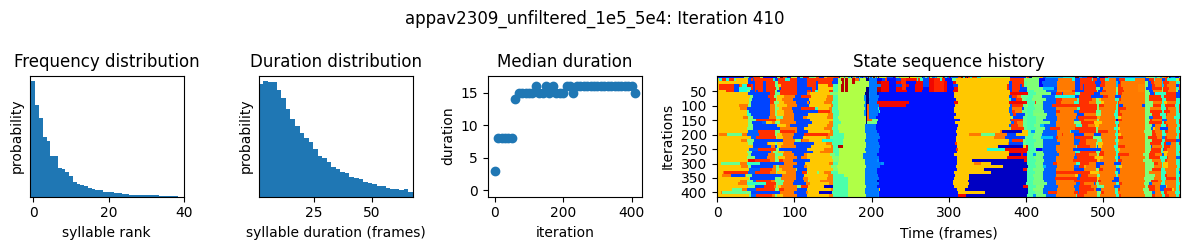

 80%|████████████████████████▋      | 320/401 [1:07:01<12:09,  9.01s/it]

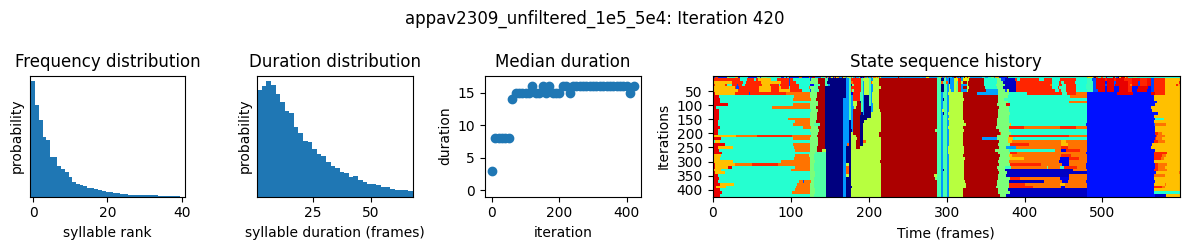

 82%|█████████████████████████▌     | 330/401 [1:08:42<10:41,  9.03s/it]

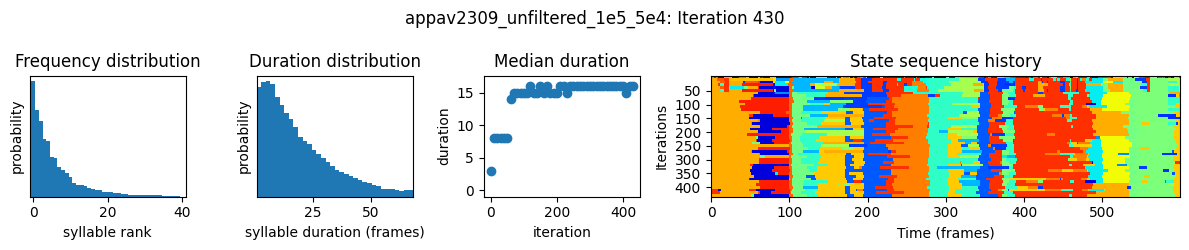

 85%|██████████████████████████▎    | 340/401 [1:10:23<09:10,  9.02s/it]

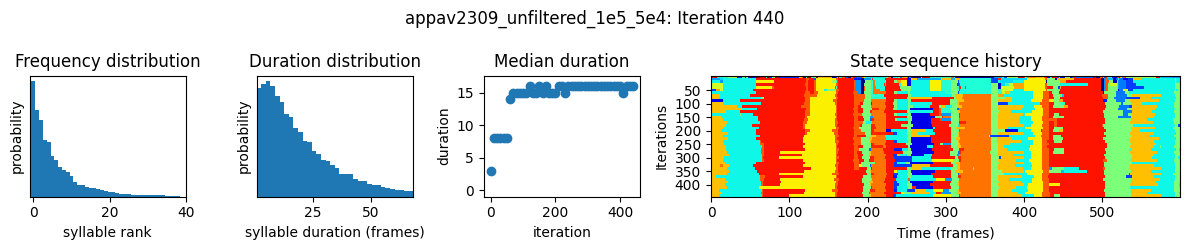

 87%|███████████████████████████    | 350/401 [1:12:04<07:39,  9.01s/it]

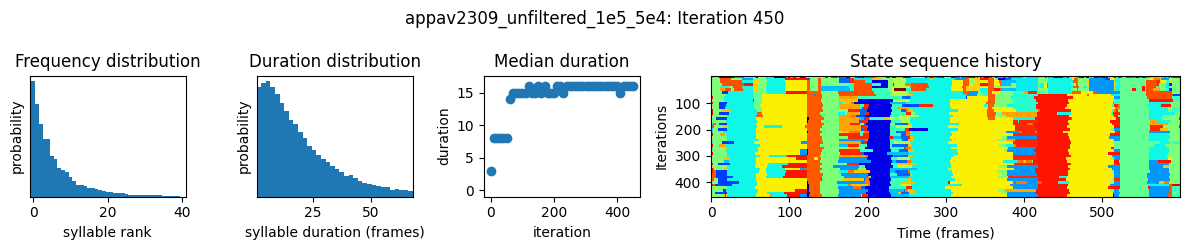

 90%|███████████████████████████▊   | 360/401 [1:13:45<06:10,  9.03s/it]

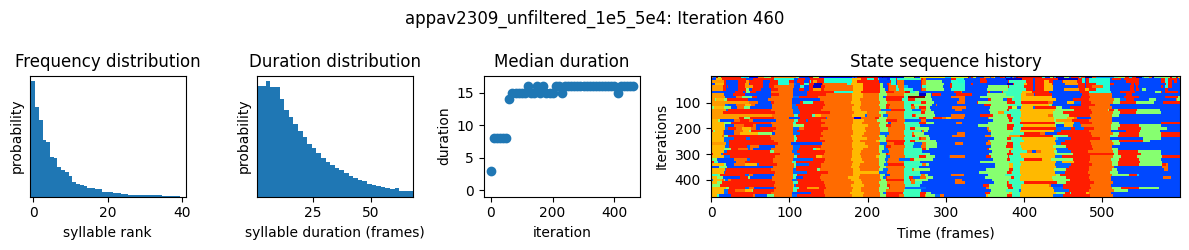

 92%|████████████████████████████▌  | 370/401 [1:15:26<04:40,  9.05s/it]

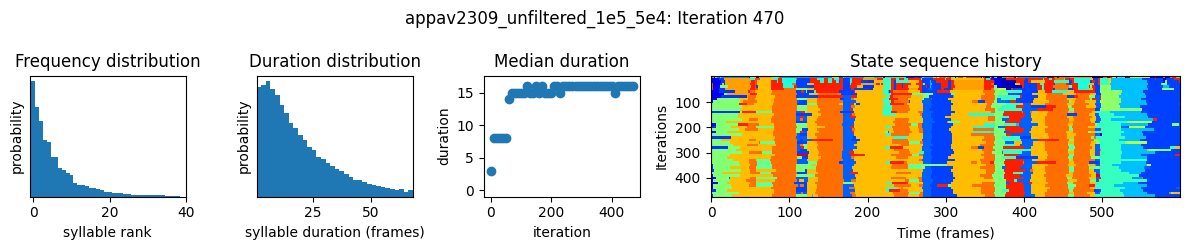

 95%|█████████████████████████████▍ | 380/401 [1:17:09<03:10,  9.06s/it]

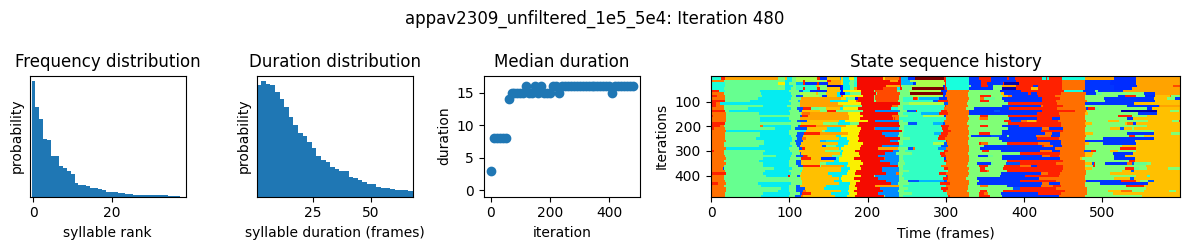

 97%|██████████████████████████████▏| 390/401 [1:18:52<01:39,  9.07s/it]

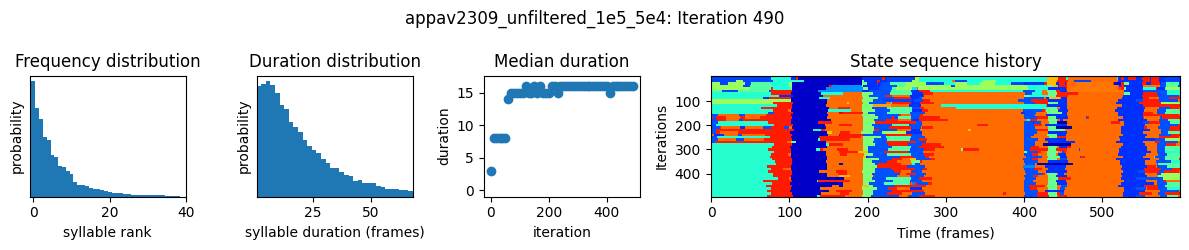

100%|██████████████████████████████▉| 400/401 [1:20:35<00:09,  9.04s/it]

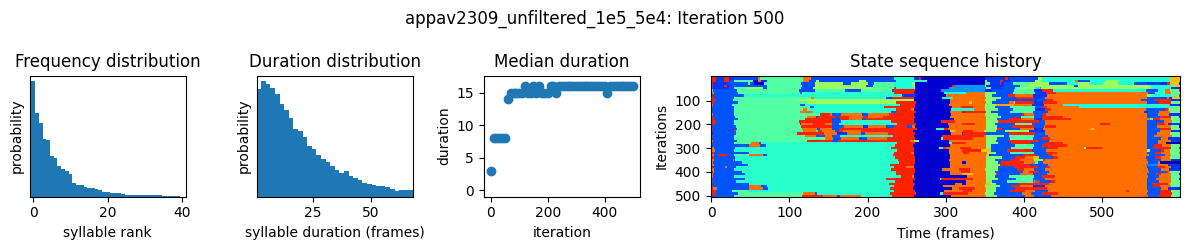

100%|███████████████████████████████| 401/401 [1:20:59<00:00, 12.12s/it]


In [23]:
# load model checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(
    project_dir, model_name, iteration = num_ar_iters)

# modify kappa to maintain the desired syllable time-scale
model = kpms.update_hypparams(model, kappa = full_model_kappa)

# run fitting for an additional 500 iters
model = kpms.fit_model(
    model, 
    data, 
    metadata, 
    project_dir, 
    model_name, 
    ar_only = False, 
    start_iter = current_iter, 
    num_iters = current_iter + num_full_iters, 
    parallel_message_passing = False, 
    save_every_n_iters = 10)[0]

In [ ]:
# modify a saved checkpoint so syllables are ordered by frequency
kpms.reindex_syllables_in_checkpoint(project_dir, model_name)

Reindexing:  63%|██████▉    | 32/51 [03:09<01:51,  5.86s/model snapshot]

In [ ]:
model, data, metadata, current_iter = kpms.load_checkpoint(project_dir, model_name)
results = kpms.extract_results(model, metadata, project_dir, model_name)

In [ ]:
kpms.generate_trajectory_plots(coordinates, results, project_dir, 
    model_name, **config())

#### Select Seed
Generated models with 20 different seeds and selected the model with the highest EML score.

In [ ]:
num_model_fits = 20
prefix = model_name

for restart in range(num_model_fits):
    print(f"Fitting model {restart}")
    model_name = f'{prefix}-{restart}'

    model = kpms.init_model(
        data, pca=pca, **config(), seed=jax.random.PRNGKey(restart)
    )

    # stage 1: fit the model with AR only
    model = kpms.update_hypparams(model, kappa = ar_only_kappa)
    model = kpms.fit_model(
        model,
        data,
        metadata,
        project_dir,
        model_name,
        ar_only = True,
        num_iters = num_ar_iters
    )[0]

    # stage 2: fit the full model
    model = kpms.update_hypparams(model, kappa=full_model_kappa)
    kpms.fit_model(
        model,
        data,
        metadata,
        project_dir,
        model_name,
        ar_only = False,
        start_iter = num_ar_iters,
        num_iters = num_ar_iters + num_full_iters
    )

    kpms.reindex_syllables_in_checkpoint(project_dir, model_name)
    model, data, metadata, current_iter = kpms.load_checkpoint(project_dir, model_name)
    results = kpms.extract_results(model, metadata, project_dir, model_name)